In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

C:\Users\grego\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


##### Decision Boundary Function (one small modification)

In [2]:
## a function for plotting the decision boundary
# Set min and max values and give it some padding
def decision_boundary(X,y,clf,ax):
    x_min, x_max = X[:, 0].min(), X[:, 0].max() 
    y_min, y_max = X[:, 1].min(), X[:, 1].max() 
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100).reshape(-1,1), np.linspace(y_min, y_max, 100).reshape(-1,1))
    # Predict the function value for the whole gid
    X_new = np.c_[xx.ravel(), yy.ravel()]
    y_pred = clf.predict(X_new) # Translates slice objects to concatenation along the second axis
    print(y_pred.shape)
    zz = y_pred.reshape(xx.shape)
    print(zz.shape)
    # Plot the contour and training examples
    #fig, ax = plt.subplots()
    from matplotlib.colors import ListedColormap
    cm2 = ListedColormap(['#0000aa', '#ff2020','#386cb0'])
    ax.contourf(xx, yy, zz,alpha=.4, cmap=cm2) 
    ax.scatter(X[:, 0], X[:, 1], c =y)
    ax.set_xlabel('feature1')
    ax.set_ylabel('feature2')
    return ax

#### Implementing a Bagging  Classifier on Iris Dataset

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=50, n_jobs=-1, random_state=42)

In [6]:
print("Accuracy on training set: {:.3f}".format(bag_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(bag_clf.score(X_test, y_test)))

Accuracy on training set: 0.983
Accuracy on test set: 0.800


(10000,)
(100, 100)


<AxesSubplot:xlabel='feature1', ylabel='feature2'>

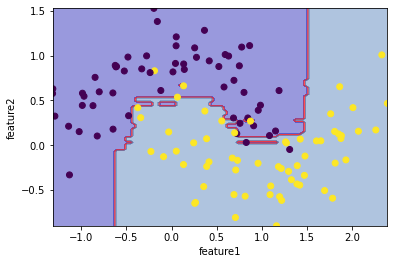

In [7]:
ax = plt.gca()
decision_boundary(X_train,y_train,bag_clf,ax)

In [8]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50,
                           oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.85

#### Implementing RF Classifier on Iris Dataset

In [9]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier


iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

X_train, X_test , y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.20,random_state=42)

RF_clf = RandomForestClassifier(n_estimators=50, random_state=42)
RF_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [10]:
X_train.shape

(120, 2)

In [11]:
print("Accuracy on training set: {:.3f}".format(RF_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RF_clf.score(X_test, y_test)))

Accuracy on training set: 0.992
Accuracy on test set: 1.000


##### Visualizing the Decision Boundary 

In [ ]:
ax = plt.gca()
decision_boundary(X_train,y_train,RF_clf,ax)

#### Implementing AdaBoost Classifier on Iris Dataset

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

In [ ]:
print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

#### Calculating feature importance for the RF model

In [ ]:
#feature importance
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score, 2), name)

##### Ensemble methods using the make moons dataset

Text(0, 0.5, 'feature2')

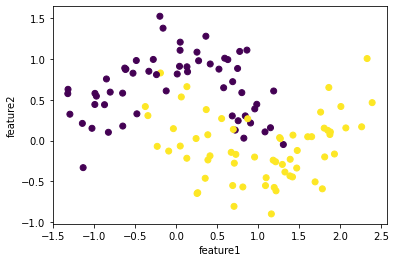

In [4]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=150, noise = 0.25, random_state=42)
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
plt.scatter(X_train[:,0],X_train[:,1], marker = 'o', c= y_train)
plt.xlabel('feature1')
plt.ylabel('feature2')

### Decision Tree Regression

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

In [ ]:
from sklearn import tree
text_representation = tree.export_text(tree_reg)
print(text_representation)

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_reg, feature_names='x', filled=True)

#### Implementing a RF  Classifier on make moons dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i+1))
    decision_boundary(X_train, y_train, tree,ax)
decision_boundary(X_train,y_train,forest,ax=axes.ravel()[5])
axes.ravel()[5].set_title("Random Forest")

In [ ]:
forest_100 = RandomForestClassifier(n_estimators=100, random_state=2)
forest_100.fit(X_train, y_train)

In [ ]:
ax = plt.gca()
decision_boundary(X_train,y_train,forest_100,ax)